In [1]:
import pandas as pd
import numpy as np
frame = pd.read_csv('final_data/finalframe.csv',sep=';',index_col=[0])

In [5]:
np.isin(frame.index,[pd.to_datetime(x) for x in ('2020-05-01',
'2020-06-01',
'2015-03-01')])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [500]:
X = frame.iloc[:,0:len(frame.columns)-1]

In [501]:
y = frame.iloc[:,len(frame.columns)-1]

In [502]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = scaler.get_feature_names_out()

In [503]:
from sklearn.model_selection import train_test_split

In [504]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.2)

In [505]:
from sklearn.linear_model import ElasticNet

In [506]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [390]:
model =ElasticNet(max_iter=100000,alpha=.01)

In [391]:
model = model.fit(X_train,y_train)

In [392]:
model.predict(X_test)

array([ 3.62256027,  2.98460394,  0.88186734,  1.60128411,  0.53388654,
        0.44832434,  0.8209542 ,  1.31495408,  2.21866595,  1.92555893,
        1.61150998,  0.8219636 ,  0.74488109, -0.09923681,  0.93922783,
        1.85247398,  0.73246729,  0.3228601 ])

In [393]:
y_test.to_numpy()

array([3.8277182 , 3.16215214, 0.71077186, 1.88872843, 0.23856367,
       0.31956491, 0.84131742, 1.50290363, 2.37805685, 0.45543704,
       1.63798344, 0.96300019, 0.77169701, 0.0091908 , 1.38572148,
       1.83068405, 0.8624281 , 0.26024736])

In [394]:
mae(y_train,model.predict(X_train))

0.06823292613257609

In [395]:
mae(y_test,model.predict(X_test))

0.22593136121113144

In [396]:
mape(y_test,model.predict(X_test))

1.017105009381836

In [397]:
y_test

2015-03-01    3.827718
2016-02-01    3.162152
2019-06-01    0.710772
2018-06-01    1.888728
2020-07-01    0.238564
2017-07-01    0.319565
2018-10-01    0.841317
2018-08-01    1.502904
2021-08-01    2.378057
2022-07-01    0.455437
2015-08-01    1.637983
2017-03-01    0.963000
2017-10-01    0.771697
2020-04-01    0.009191
2015-09-01    1.385721
2016-05-01    1.830684
2017-01-01    0.862428
2019-09-01    0.260247
Name: target, dtype: float64

In [398]:
coefs = pd.DataFrame(zip(np.array(X_train.columns),model.coef_),columns=['Variable','Coef'])

In [399]:
(coefs[coefs['Coef'] != 0]).sort_values('Coef',ascending=False)

,Variable,Coef
127,28151_e2_sma6,0.121337
137,FIPE12_FIPE0002Q2_sma3_sma6_sma12_o1,0.116420
353,20122_sma12,0.099211
877,24387_e2_sma3_sma12_o1,0.097072
729,4735_sma3,0.091993
...,...,...
672,5741_e2_sma3_sma6_o1,-0.049470
531,21962_e2_sma3_sma12_o1,-0.061832
371,21941_e2_sma6,-0.065006
716,5456_e2,-0.081226


In [400]:
cof = (coefs[coefs['Coef'] != 0]).sort_values('Coef',ascending=False)

In [401]:
cof['Serie'] = cof['Variable'].str.split('_',expand=True)[0]

In [402]:
bcb_md = pd.read_csv('data/bcb_metadata.csv',encoding='latin-1',sep=';')

In [403]:
cof.merge(bcb_md.astype(str),how='left',left_on='Serie',right_on='Codigo')[['Variable','Nome','Coef']]

,Variable,Nome,Coef
0,28151_e2_sma6,PMS - Índice de volume de serviços - Outros se...,0.121337
1,FIPE12_FIPE0002Q2_sma3_sma6_sma12_o1,NaN,0.116420
2,20122_sma12,Índice de volume de vendas no varejo - Outros ...,0.099211
3,24387_e2_sma3_sma12_o1,Rendimento médio real habitual das pessoas ocu...,0.097072
4,4735_sma3,NFSP sem desvalorização cambial - Fluxo acumul...,0.091993
...,...,...,...
75,5741_e2_sma3_sma6_o1,NFSP sem desvalorização cambial (% PIB) - Flux...,-0.049470
76,21962_e2_sma3_sma12_o1,Produção Industrial (2012=100)  Geral  Norde...,-0.061832
77,21941_e2_sma6,Produção Industrial (2012=100) - Geral - Com a...,-0.065006
78,5456_e2,NFSP sem desvalorização cambial (% PIB) - Flux...,-0.081226


<AxesSubplot:>

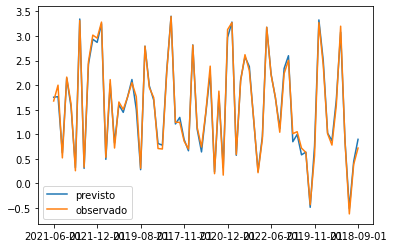

In [404]:
pd.DataFrame({'previsto':model.predict(X_train),'observado':y_train}).plot()

<AxesSubplot:>

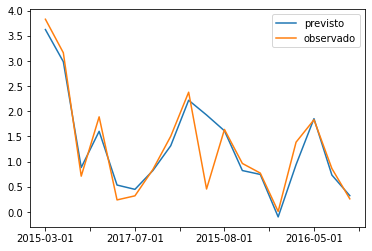

In [546]:
pd.DataFrame({'previsto':model.predict(X_test),'observado':y_test}).plot()

In [406]:
X = X_train.loc[:,model.coef_ > 0]

In [407]:
X_train = X_train.loc[:,model.coef_ > 0]
X_test = X_test.loc[:,model.coef_ > 0]

In [414]:
import sklearn.neural_network as nn

In [574]:
m = nn.MLPRegressor(activation='tanh',hidden_layer_sizes=(500,250),max_iter=1000,alpha=.01)

In [575]:
m.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(500, 250),
             max_iter=1000)

In [576]:
mae(y_train,m.predict(X_train))

0.045866820015051414

In [577]:
mae(y_test,m.predict(X_test))

0.31753467020631193

In [578]:
mape(y_test,m.predict(X_test))

1.7241714119134002

In [579]:
from sklearn.linear_model import SGDRegressor

In [580]:
m = SGDRegressor(max_iter=100000,alpha=0.1,fit_intercept=False)

In [581]:
m.fit(X_train,y_train)

SGDRegressor(alpha=0.1, fit_intercept=False, max_iter=100000)

In [582]:
m.predict(X_test)

array([-2.91080058e+15, -2.92037177e+15, -4.46951933e+12, -1.08309794e+12,
       -5.34994106e+12, -1.56958202e+13, -1.76240669e+12, -1.72789748e+12,
       -7.85375795e+13, -5.18315924e+12, -4.27151233e+15, -1.78431154e+13,
       -6.57097440e+12, -1.34029161e+13, -4.29804837e+15, -7.44340420e+13,
       -1.64297706e+13, -1.04275892e+13])

In [583]:
mae(y_test,m.predict(X_test))

814091716151799.5

In [584]:
from catboost import CatBoostRegressor

In [585]:
m = CatBoostRegressor(iterations=1000,learning_rate=.01,depth=4,l2_leaf_reg=1)

In [586]:
m.fit(X_train,y_train)

0:	learn: 1.0014430	total: 24.7ms	remaining: 24.7s
1:	learn: 0.9950153	total: 41ms	remaining: 20.5s
2:	learn: 0.9887478	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9821571	total: 67.4ms	remaining: 16.8s
4:	learn: 0.9756688	total: 80.9ms	remaining: 16.1s
5:	learn: 0.9693886	total: 99.6ms	remaining: 16.5s
6:	learn: 0.9630304	total: 115ms	remaining: 16.3s
7:	learn: 0.9581171	total: 131ms	remaining: 16.3s
8:	learn: 0.9524924	total: 145ms	remaining: 15.9s
9:	learn: 0.9465751	total: 182ms	remaining: 18s
10:	learn: 0.9406925	total: 213ms	remaining: 19.1s
11:	learn: 0.9352112	total: 234ms	remaining: 19.3s
12:	learn: 0.9296062	total: 265ms	remaining: 20.1s
13:	learn: 0.9241876	total: 283ms	remaining: 19.9s
14:	learn: 0.9182868	total: 312ms	remaining: 20.5s
15:	learn: 0.9126455	total: 328ms	remaining: 20.2s
16:	learn: 0.9069601	total: 342ms	remaining: 19.8s
17:	learn: 0.9015230	total: 358ms	remaining: 19.5s
18:	learn: 0.8960886	total: 375ms	remaining: 19.4s
19:	learn: 0.8910680	total: 390ms	remai

In [587]:
m.predict(X_test)

array([3.18487069, 2.76007215, 0.96963462, 1.27664384, 0.1789577 ,
       0.33693246, 0.90331371, 1.38547107, 2.15514457, 1.78137131,
       1.99436724, 0.81754519, 0.78288172, 0.29145948, 1.84762774,
       1.98002715, 0.78655268, 0.45546429])

In [588]:
mae(y_test,m.predict(X_test))

0.2999309801529801

In [589]:
mae(y_train,m.predict(X_train))

0.027398943708478143